# Analysis of paths taken by players

## loading compiled data and boostrating python environment

In [1]:
%run "0. config.ipynb"

2008


In [2]:
#players_stats = pd.DataFrame.from_csv("data/players_stats.csv")
players_coordinates = pd.DataFrame.from_csv("data/players_coordinates.csv")

In [3]:
players_coordinates.head(5)

,type,serverTime,x,y,level
playerId,,,,,
9c183209-8867-46bb-9d29-9dda57e5a7bd,start,2016-02-04T20:12:38.789Z,-6,143,NaN
9c183209-8867-46bb-9d29-9dda57e5a7bd,selectmenu,2016-02-04T20:12:38.789Z,-6,143,NaN
ab2d0f9a-13ec-4bc0-b5cd-58942d906954,start,2016-02-04T20:18:08.038Z,-6,143,NaN
ab2d0f9a-13ec-4bc0-b5cd-58942d906954,selectmenu,2016-02-04T20:18:18.039Z,-6,143,NaN
ecfe1f90-19c7-4ab9-8d6f-bd8feb7ff472,start,2016-02-04T20:31:05.379Z,-6,143,NaN


In [4]:
logs = players_coordinates[ (players_coordinates["level"] == "adventure1") & (players_coordinates["y"] < 1500) ] 

## just plot it!

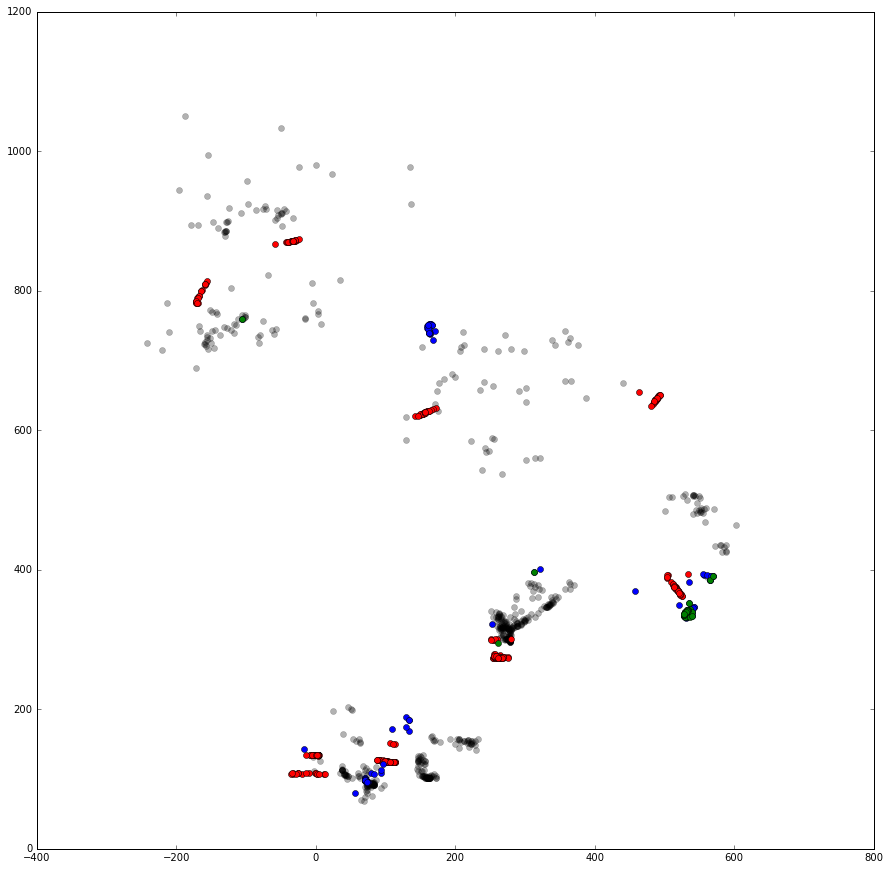

In [5]:
plt.figure(figsize=(15,15))
plt.axis('equal')

types = ["death", "reach", "equip", "craft"]
c = ["black", "red", "blue", "green"]
a = [ 0.3, 1, 1,1 ]

for i, t in enumerate(types):
  pts = logs[logs["type"] == t]
  x = pts["x"]
  y = pts["y"]

  plt.plot(x, y, 'o', c=c[i], lw=0, alpha=a[i])

plt.show()

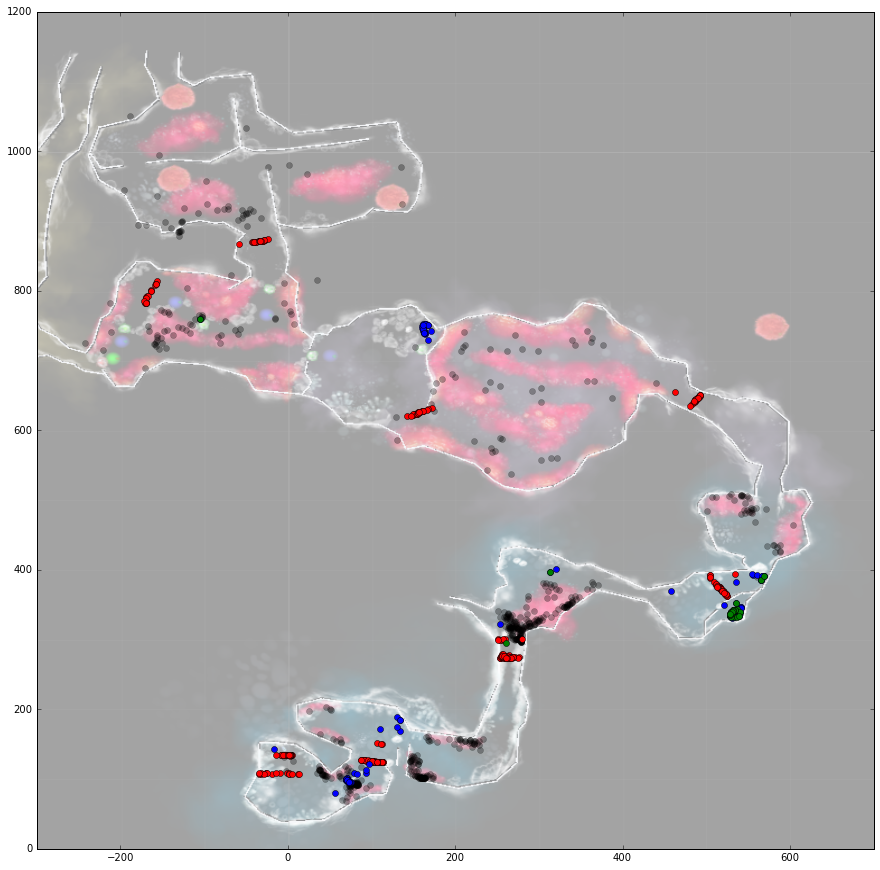

In [6]:
import matplotlib.image as image

plt.figure(figsize=(15,15))
plt.axis('equal')

im = image.imread('images/map.png')

types = ["death", "reach", "equip", "craft"]
c = ["black", "red", "blue", "green"]
a = [ 0.3, 1, 1,1 ]

ox = -406
oy = -68
r = 1.336
plt.imshow(im, aspect='auto', zorder=-1, extent=(r * (0+ox), r * (995+ox), r * (0+oy), r * (1023+oy)), alpha=0.5)

for i, t in enumerate(types):
  pts = logs[logs["type"] == t]
  x = pts["x"]
  y = pts["y"]

  plt.plot(x, y, 'o', c=c[i], lw=0, alpha=a[i])

plt.xlim([-300, 700])
plt.ylim([0, 1200])
plt.show()

## superposition of paths

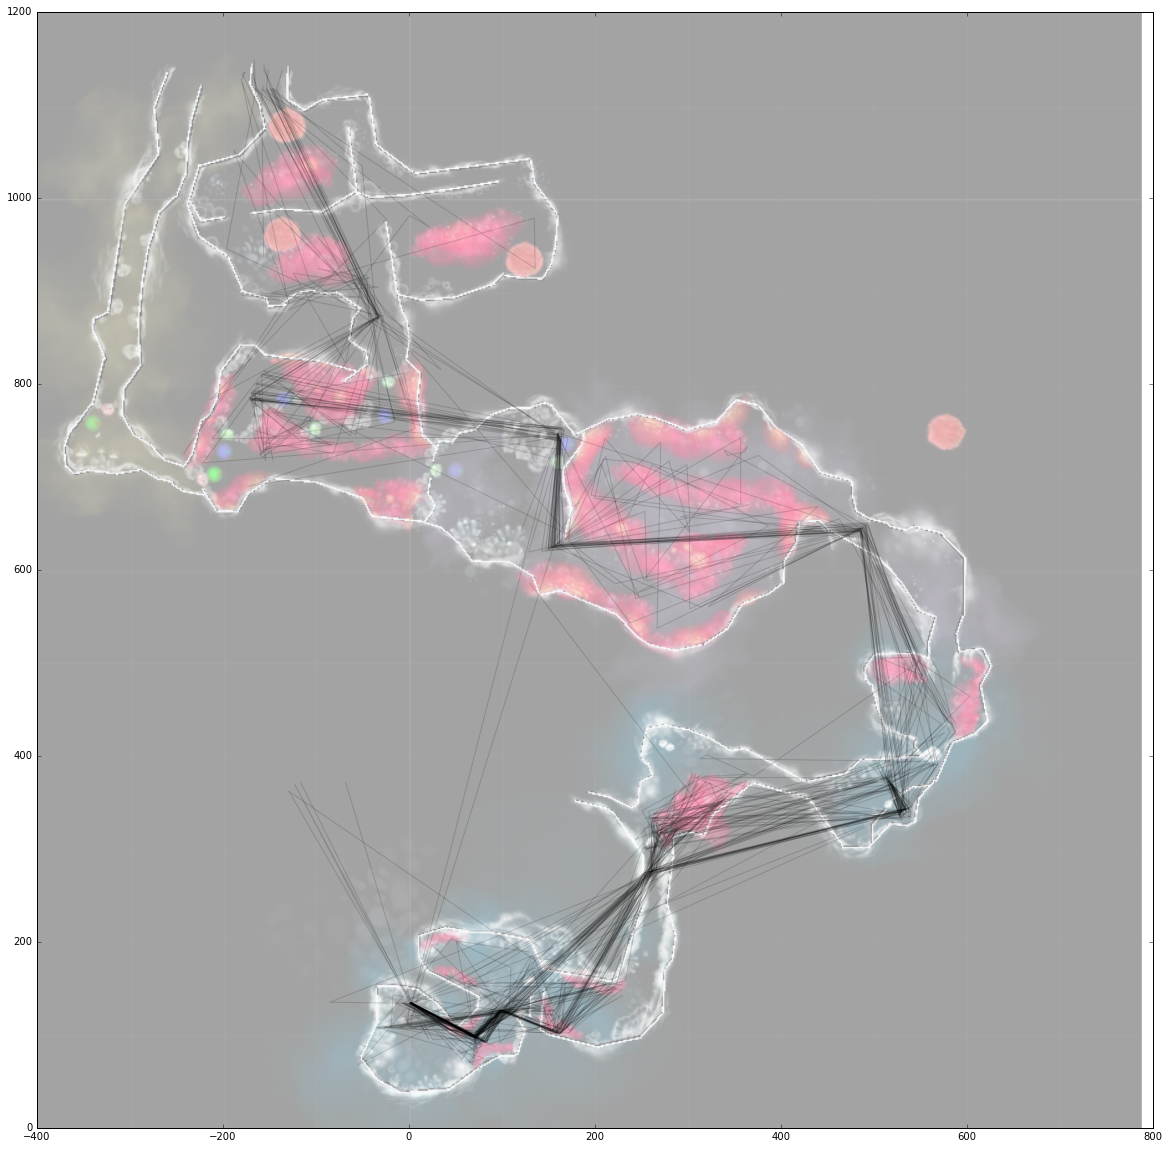

In [7]:
df = logs.loc[[ x for x in players_coordinates.index.unique() if len(players_coordinates.loc[x,:]) > 5],:]

players_list = list(df.index.unique())
plt.figure(figsize=(20,20))

ox = -406
oy = -68
r = 1.336
plt.imshow(im, aspect='auto', zorder=-1, extent=(r * (0+ox), r * (995+ox), r * (0+oy), r * (1023+oy)), alpha=0.5)

for i, p in enumerate(players_list):
  select = df.loc[p,:]

  x = select["x"]
  y = select["y"]
  
  plt.plot(x,y, "-", c="black", alpha=0.15)

plt.axis('equal')

plt.xlim([-300, 700])
plt.ylim([0, 1200])
  
plt.show();

## indivual paths

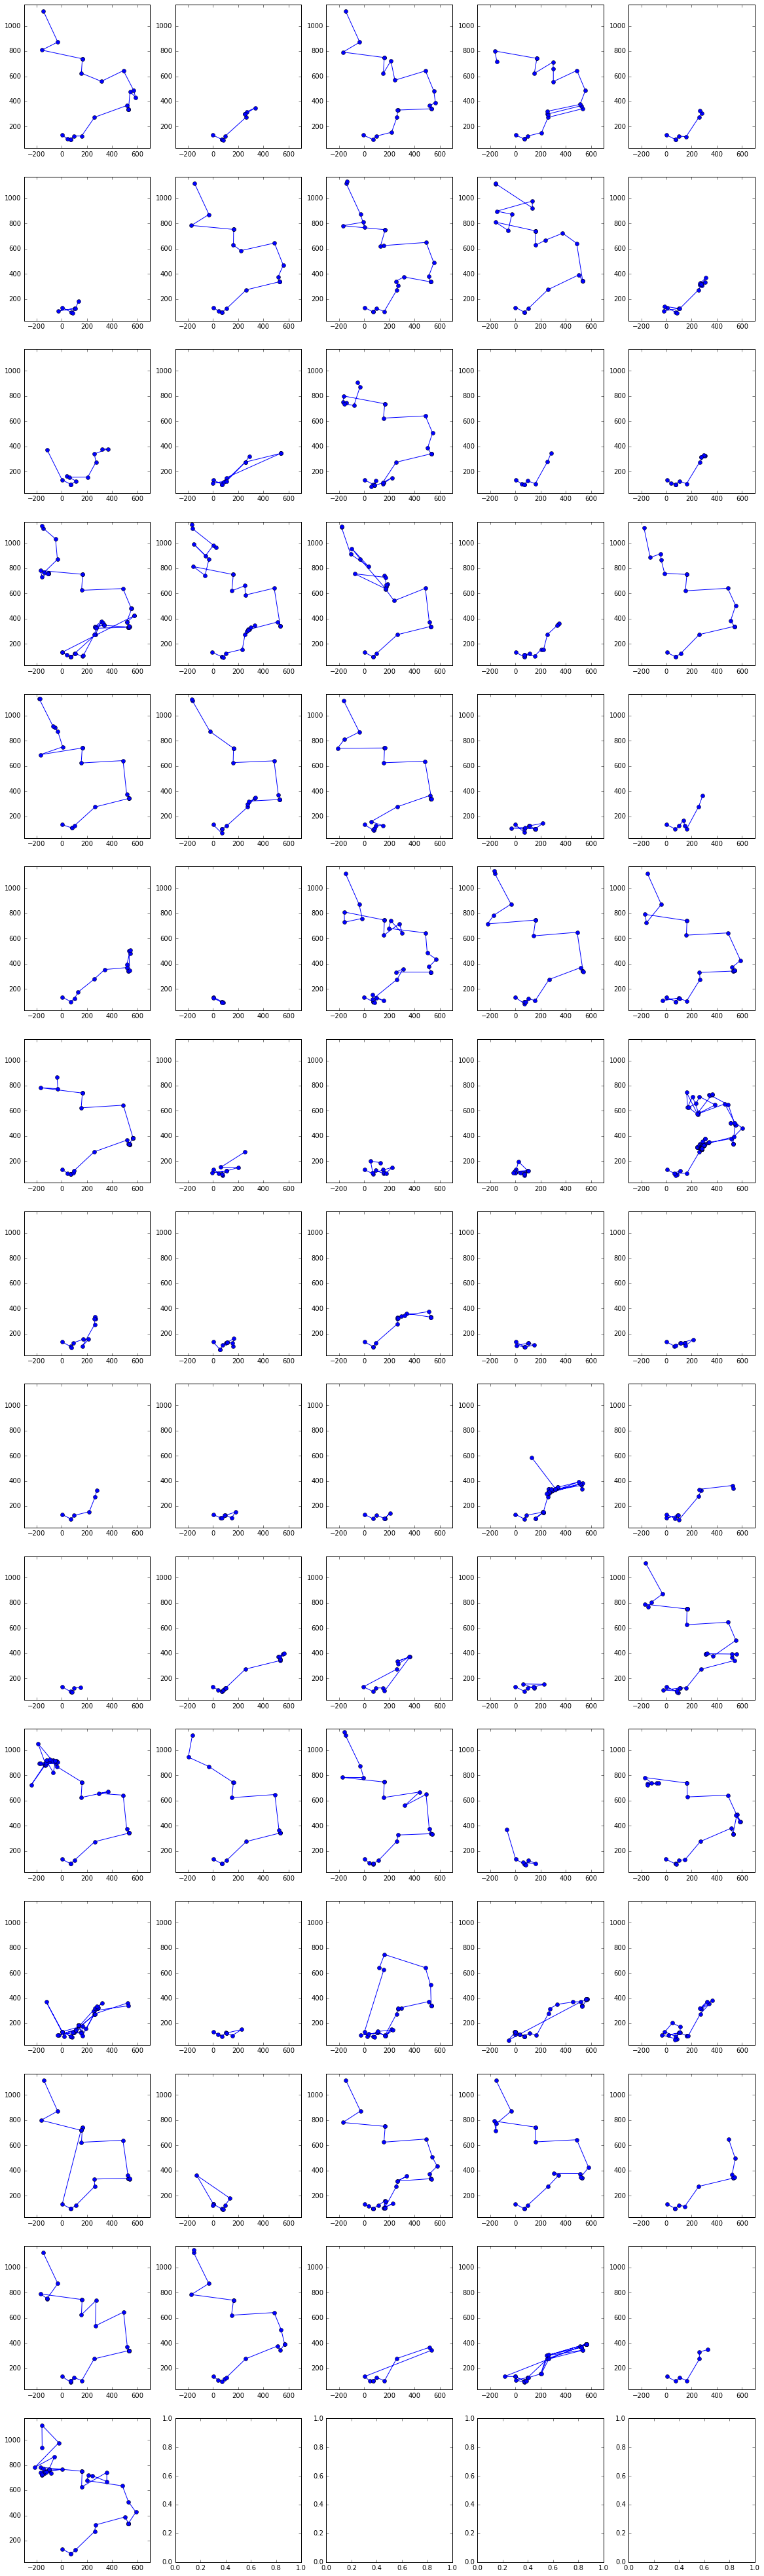

In [8]:
df = logs.loc[[ x for x in logs.index.unique() if len(logs.loc[x,:]) > 5],:]

players_list = list(df.index.unique())
plt.figure()

f, axarr = plt.subplots(len(players_list)/5+1, 5, figsize=(20,70))

for i, p in enumerate(players_list):
  select = df.loc[p,:]

  ax = axarr[i/5, i%5]

  x = select["x"]
  y = select["y"]
  
  ax.plot(x,y, "-o")
  ax.axis('equal')

  ax.set_xlim([-300, 700])
  ax.set_ylim([0, 1200])

plt.show();